In [5]:
# pandas 라이브러리를 pd라는 이름으로 가져옵니다. pandas는 데이터 분석 및 조작을 위한 Python 라이브러리입니다.
import pandas as pd

# URL에 있는 CSV 파일을 pandas의 read_csv 함수를 사용해 읽어와 DataFrame 형식으로 저장합니다.
# 'fish' 변수에 할당된 DataFrame은 테이블 형식으로 CSV 데이터를 가지고 있습니다.
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# DataFrame의 앞쪽 5개의 행을 출력합니다.
# .head() 메서드는 기본적으로 상위 5개의 행을 반환하며, 괄호 안에 숫자를 넣으면 원하는 행 수를 지정할 수 있습니다.
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터프레임
- 판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조

In [7]:
# 'fish' 데이터프레임의 'Species' 열에 있는 고유한 값을 추출하여 출력합니다.
# pd.unique() 함수는 중복되지 않는 고유한 값들을 배열 형태로 반환합니다.
# 이를 통해 데이터셋에 어떤 종류의 어류(Species)가 있는지 확인할 수 있습니다.
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [9]:
# 'fish' 데이터프레임에서 'Weight', 'Length', 'Diagonal', 'Height', 'Width' 열만 선택하여 새로운 배열로 만듭니다.
# .to_numpy() 메서드는 pandas DataFrame을 NumPy 배열로 변환합니다.
# 'fish_input' 변수는 어류의 각 특성 데이터만을 담은 2차원 배열이 됩니다.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# fish_input 배열의 첫 5개의 행을 출력하여 변환 결과를 확인합니다.
# [:5]는 배열의 첫 5행을 슬라이싱하여 출력합니다.
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [12]:
# 'fish' 데이터프레임의 'Species' 열을 NumPy 배열로 변환하여 어류의 종 정보를 저장합니다.
# 이 배열은 지도 학습의 타겟 값으로 사용됩니다.
fish_target = fish['Species'].to_numpy()

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
# train_test_split 함수는 데이터를 섞은 후, 75%는 훈련 세트로, 25%는 테스트 세트로 나눕니다.
# random_state=42로 고정하여 데이터 분할이 매번 동일하게 이루어지도록 합니다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# StandardScaler를 사용하여 훈련 세트와 테스트 세트를 표준화(정규화)합니다.
# 표준화는 평균을 0, 표준편차를 1로 맞추어 데이터를 변환하는 전처리 과정입니다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()       # StandardScaler 객체 생성
ss.fit(train_input)         # 훈련 세트의 통계값으로 scaler를 학습합니다.
train_scaled = ss.transform(train_input)   # 훈련 세트를 표준화하여 train_scaled에 저장
test_scaled = ss.transform(test_input)     # 테스트 세트도 동일한 scaler로 표준화하여 test_scaled에 저장

# KNeighborsClassifier 클래스 객체를 생성하고, 훈련 세트로 모델을 훈련한 후 훈련 및 테스트 세트의 정확도를 확인합니다.
# n_neighbors=3으로 최근접 이웃의 개수를 3으로 지정하여 분류 모델을 구성합니다.
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)   # KNN 분류 모델을 생성
kn.fit(train_scaled, train_target)         # 표준화된 훈련 세트와 타겟으로 모델을 학습시킴

# 학습된 모델의 성능을 확인합니다.
# kn.score()는 주어진 데이터와 타겟을 기반으로 모델의 정확도를 계산합니다.
print(kn.score(train_scaled, train_target))  # 훈련 세트의 정확도 출력
print(kn.score(test_scaled, test_target))    # 테스트 세트의 정확도 출력

0.8907563025210085
0.85


- 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류(multi-class classification)이라 함
- 이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃 데이터를 만듦
- 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨짐

In [15]:
# kn.classes_ 속성은 KNeighborsClassifier 모델이 학습한 클래스(종) 목록을 알파벳 순으로 정렬하여 반환합니다.
# 이는 분류 모델이 예측할 수 있는 가능한 클래스(어종)들을 보여줍니다.
print(kn.classes_)  # 분류 모델이 학습한 클래스 목록 출력

# 테스트 세트의 처음 5개 샘플에 대해 타겟 값을 예측합니다.
# kn.predict() 함수는 주어진 데이터에 대해 모델이 예측한 클래스(타깃 값)를 반환합니다.
# 여기서는 표준화된 테스트 세트 중 첫 5개의 데이터를 모델에 입력하여 예측 결과를 출력합니다.
print(kn.predict(test_scaled[:5]))  # 첫 5개 샘플의 예측 결과 출력

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [18]:
import numpy as np

# predict_proba() 메서드는 각 클래스에 대한 확률을 반환합니다.
# 테스트 세트의 처음 5개 샘플에 대해 각 클래스에 속할 확률을 예측하여 'proba' 변수에 저장합니다.
proba = kn.predict_proba(test_scaled[:5])

# np.round() 함수를 사용해 예측 확률을 소수점 네 번째 자리까지 반올림하여 출력합니다.
# predict_proba()의 결과는 'kn.classes_'에 정의된 클래스 순서대로 나열되며, 클래스별 확률이 배열 형식으로 표시됩니다.
print(np.round(proba, decimals=4))  # 각 클래스별 확률을 소수점 네 번째 자리까지 반올림하여 출력

# kneighbors() 메서드는 특정 샘플에 대한 k개의 최근접 이웃의 거리와 인덱스를 반환합니다.
# 여기서는 테스트 세트의 네 번째 샘플(test_scaled[3:4])에 대해 최근접 이웃을 찾습니다.
# distances에는 각 이웃까지의 거리, indexes에는 각 이웃의 훈련 세트 내 인덱스가 반환됩니다.
distances, indexes = kn.kneighbors(test_scaled[3:4])

# train_target[indexes]를 사용해, 테스트 샘플의 최근접 이웃으로 선택된 훈련 샘플들의 실제 타겟(클래스) 값을 출력합니다.
print(train_target[indexes])  # 네 번째 샘플의 최근접 이웃에 해당하는 타겟 값 출력

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


# 로지스틱 회귀
- 회귀이지만 분류 모델임
- 선형 회귀와 동일하게 선형 방정식 학습
- z = a * (weight) + b * (Length) + c * (Diagonal) + d * (height) + e * (weight) + f
- 위 수식을 확률로 표한하기 위해 시그모이드 함수(sigmoid function)을 사용함 -> p183
    - z가 무한하게 큰 음수일 경우 0에 가까워지고 무한하게 큰 양수일 경우 1에 가까워짐
    - z가 0이 될 때는 0.5가 됨

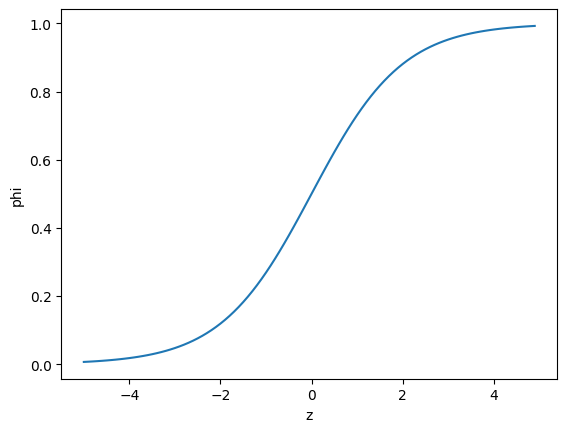

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# z 배열을 생성합니다. -5부터 5까지 0.1 간격으로 연속적인 값들을 포함합니다.
# 이 범위는 시그모이드 함수의 입력 값으로 사용됩니다.
z = np.arange(-5, 5, 0.1)

# 시그모이드 함수(phi)를 계산합니다.
# 시그모이드 함수는 1 / (1 + e^(-z))으로 정의되며, 분류 모델에서 확률을 나타내는 데 자주 사용됩니다.
phi = 1 / (1 + np.exp(-z))

# z와 phi를 그래프로 시각화합니다.
# z는 x축에, phi는 y축에 설정하여 시그모이드 함수의 형태를 보여줍니다.
plt.plot(z, phi)          # 시그모이드 함수를 그래프로 그립니다.
plt.xlabel('z')           # x축에 'z' 레이블을 설정
plt.ylabel('phi')         # y축에 'phi' 레이블을 설정
plt.show()                # 그래프를 화면에 표시합니다.

In [20]:
# 넘파이 배열을 생성합니다. 이 배열은 문자 'A'부터 'E'까지의 요소를 포함합니다.
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

# 불리언 인덱싱을 사용하여 배열에서 특정 요소를 선택합니다.
# 불리언 배열 [True, False, True, False, False]를 사용하여 
# True 값이 위치한 인덱스에 해당하는 요소만 선택됩니다.
# 여기서는 첫 번째 요소('A')와 세 번째 요소('C')가 선택됩니다.
print(char_arr[[True, False, True, False, False]])  # ['A' 'C'] 출력

['A' 'C']


In [34]:
# train_scaled와 train_target 배열에 불리언 인덱싱을 적용하여 'Bream'과 'Smelt' 종의 데이터를 선택합니다.
# bream_smelt_indexes는 각 타겟 값이 'Bream' 또는 'Smelt'인지에 대한 불리언 배열입니다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

# 선택된 인덱스를 사용하여 'Bream'과 'Smelt'에 해당하는 훈련 세트의 입력 데이터와 타겟 값을 필터링합니다.
train_bream_smelt = train_scaled[bream_smelt_indexes]  # 필터링된 입력 데이터
target_bream_smelt = train_target[bream_smelt_indexes]  # 필터링된 타겟 데이터

# 로지스틱 회귀 모델을 생성합니다.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 필터링된 훈련 데이터를 사용하여 로지스틱 회귀 모델을 훈련합니다.
lr.fit(train_bream_smelt, target_bream_smelt)

# 훈련된 모델을 사용하여 첫 5개의 훈련 샘플에 대한 예측을 수행합니다.
print(lr.predict(train_bream_smelt[:5]))  # 예측 결과 출력

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [33]:
# 로지스틱 회귀 모델을 사용하여 첫 5개의 훈련 샘플에 대한 클래스별 확률을 예측합니다.
# predict_proba() 메서드는 각 샘플이 각 클래스에 속할 확률을 반환합니다.
# 반환되는 배열의 첫 번째 열은 음성 클래스(0)에 대한 확률, 두 번째 열은 양성 클래스(1)에 대한 확률입니다.
print(lr.predict_proba(train_bream_smelt[:5])) 

# 로지스틱 회귀 모델의 클래스 레이블을 알파벳 순으로 출력합니다.
# classes_ 속성은 모델이 훈련된 클래스 레이블을 반환하며, 기본적으로 알파벳 순서로 정렬되어 있습니다.
print(lr.classes_)  

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
['Bream' 'Smelt']


In [32]:
print(lr.coef_, lr.intercept_) # 로지스틱 회귀가 학습한 계수 확인
# 위 로지스틱 회귀 모델이 학습한 방정식
# z = -0.404 * (Weight) - 0.576 * (Length) - 0.663 * (Diagonal) - 1.013 * (Height) - 0.732 * (Width) - 2.161

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [31]:
# decision_function() 메서드를 이용하여 LogistiRegression 모델로 z값 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# z 값을 시그모이드 함수에 통과시켜 확률 계산
from scipy.special import expit
print(expit(decisions))

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


- 이진 분류일 경우 predict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력
- decision_function() 메서드는 양성 클래스에 대한 z 값을 계산
- coef_ 속성과 intercept_ 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어 있음

- LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용
    - max_iter 매개변수를 사용해서 반복 횟수 지정 가능
    - 릿지 회귀와 같이 계수의 제곱을 규제 -> L2 규제
    - 규제를 제어하는 매개변수는 C -> C의 값은 alpha와 반대로 작을수록 규제가 커짐, 기본값은 1

In [36]:
# 로지스틱 회귀 모델을 생성합니다. 
# C는 규제 강도를 나타내며, 값이 클수록 규제가 약해집니다. 여기서는 C=20으로 설정합니다.
# max_iter는 모델 훈련 시 최대 반복 횟수로, 1000으로 설정하여 더 많은 반복을 허용합니다.
lr = LogisticRegression(C=20, max_iter=1000)

# 전체 훈련 데이터를 사용하여 로지스틱 회귀 모델을 훈련합니다.
lr.fit(train_scaled, train_target)

# 훈련 세트에 대한 정확도를 출력합니다. score() 메서드는 모델의 정확도를 계산하여 반환합니다.
print(lr.score(train_scaled, train_target))

# 테스트 세트에 대한 정확도를 출력합니다.
print(lr.score(test_scaled, test_target))

# 훈련 세트와 테스트 세트의 점수가 모두 높고, 과대적합(overfitting)이나 과소적합(underfitting)으로 치우치지 않음을 확인합니다.

# 테스트 세트의 처음 5개 샘플에 대한 예측을 수행합니다.
print(lr.predict(test_scaled[:5]))  # 예측 결과 출력

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [38]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 계산합니다.
# predict_proba() 메서드는 각 클래스에 대한 확률을 반환합니다.
proba = lr.predict_proba(test_scaled[:5]) 

# 반환된 확률을 소수점 셋째 자리에서 반올림하여 출력합니다.
print(np.round(proba, decimals=3))

# 로지스틱 회귀 모델이 훈련된 클래스 레이블을 출력합니다.
print(lr.classes_)

# 이진 분류의 경우, 각 샘플에 대해 2개의 확률(클래스 0과 클래스 1)에 대한 확률을 출력합니다.
# 다중 분류의 경우, 각 샘플에 대해 클래스 개수만큼의 확률을 출력합니다.
# 가장 높은 확률을 가진 클래스가 해당 샘플의 예측 클래스가 됩니다.

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [39]:
print(lr.coef_.shape, lr.intercept_.shape) # coef_와 interceup_의 크기 출력
# 다중 분류는 클래스마다 z 값을 하나씩 계산 -> 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨
# 시그모이드 함수를 사용해 확률을 계산하는 이진 분류와는 달리 다중 분류는 소프트맥스(softmax) 함수를 사용하여 7개의 z값을 확률로 변환함

(7, 5) (7,)


# 소프트 맥스 함수
- 시그모이드 함수는 하나의 선형 방적식의 출력값(z)을 0~1 사이로 반환
- 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듦
- 지수 함수를 사용하여 만들기 때문에 정규화된 지수 함수라고도 부름 p191

In [40]:
decision = lr.decision_function(test_scaled[:5]) # 로지스틱 회귀 모델(lr)을 사용하여 test_scaled 데이터의 첫 5개 샘플에 대해 결정 함수를 계산합니다.
print(np.round(decision, decimals = 2)) # 결정 함수 결과(decision)를 소수점 2자리까지 반올림하여 더 깔끔하게 출력합니다.

# test_scaled 데이터의 첫 5개 샘플에 대해 로지스틱 회귀 모델(lr)이 예측한 결정 함수의 값을 계산합니다.
# 결정 함수(decision function)는 각 샘플이 특정 클래스에 속할 확률의 기준을 제공합니다.
# 이 함수의 결과는 이진 분류일 경우, 클래스 1에 대한 "결정 점수"로 해석될 수 있으며,
# 양수일수록 클래스 1에 가깝고 음수일수록 클래스 0에 가까움을 나타냅니다.

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [41]:
from scipy.special import softmax  # softmax 함수를 사용할 수 있도록 scipy의 special 모듈에서 임포트합니다.

# decision 배열에 softmax 함수를 적용합니다. 
# softmax 함수는 각 클래스의 로짓을 확률로 변환하는 데 사용되며,
# axis=1을 설정하여 각 샘플에 대해 확률을 계산합니다.
proba = softmax(decision, axis=1)

# 확률 값을 소수점 셋째 자리에서 반올림하여 출력합니다.
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
